## **Hate Speech Detection in social Media particularly Twitter**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data as a csv file into pandas dataframe
!curl -O https://raw.githubusercontent.com/TManmohan/data_science/TManmohan-Twitterdata/TwitterHateData.csv
tweet_data = pd.read_csv('TwitterHateData.csv',delimiter=',',engine='python',encoding='utf-8-sig')
tweet_data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3030k  100 3030k    0     0  7391k      0 --:--:-- --:--:-- --:--:-- 7391k


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## **Understanding the data**

In [ ]:
# checking the shape of the data
# this returns the rows and the columns in the data
tweet_data.shape

(31962, 3)

In [ ]:
# .info() methid returns the information about the data
# this includes the data types in the columns
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
# checking the unique values in the label column
tweet_data.label.unique()

array([0, 1])

In [ ]:
# checks for missing values in the data
# if there are missing value in any column of the data true value is returned
# otherwise false value is returned
tweet_data.isnull().any()

id       False
label    False
tweet    False
dtype: bool

# Data exploration

In [ ]:
# checking for value counts in the target column
tweet_data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


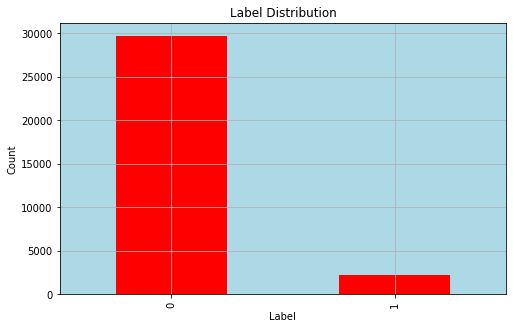

In [ ]:
# checking th distribution of the target variable
plt.figure(figsize=(8,5))
tweet_data['label'].value_counts().sort_index().plot(kind='bar',color = 'red')
plt.title('Label Distribution')
plt.grid()
plt.xlabel('Label')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("lightblue")

## **Text Cleaning**

In [ ]:
# preserving the copy of the data

tweet_dataset = tweet_data

In [ ]:
# tweet id is not important in the data and so we drop it

tweet_data.drop('id',axis=1,inplace=True)

In [ ]:
# resultant data without the id column
tweet_data.head(3)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty


### **Removing URLs and handles from the data**

In [ ]:
# removing urls from the data
tweet_data['tweet'].replace(r'http\S+','',regex=True,inplace=True)

# removing handles from the data
tweet_data['tweet'].replace(r'@\w+','',regex=True,inplace=True)

In [ ]:
# checking whether the changes made above have been implemented
tweet_data.head(3)

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty


## **Removing diacritics from tweets**

In [ ]:
# importing unicodedata
import unicodedata

In [ ]:
# this function is meant to handle diacritics 

def make_text_simple(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

tweet_data['tweet'] = tweet_data['tweet'].apply(make_text_simple)

In [ ]:
tweet_data.head(3)

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty


## **Removing stop words**

These words contains so many meaningless words such is and so using stop words we eliminate such words since they dont provide any meaning

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [ ]:
len(stop_words)

131

In [ ]:
# importing stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
tweet_data['tweet'] = tweet_data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tweet_data.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks #lyft credit can't use cause offer whee...
2,0,bihday majesty
3,0,#model love u take u time ur!!!
4,0,factsguide: society #motivation


# **Tokenizing tweets**

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
#using TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=True)
tweet_data['tweet'] = tweet_data['tweet'].apply(tweet_tokenizer.tokenize)

In [ ]:
# cehcking the resulting data
tweet_data.head(3)

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, #lyft, credit, can't, use, cause, off..."
2,0,"[bihday, majesty]"


## **Correcting spellings**

In [ ]:
from textblob import TextBlob

In [ ]:
# function to spell check
def correct_spellings(tweet):
    text_blob = TextBlob(tweet)
    checked_text = text_blob.correct()
    return checked_text

# function to remove the symbol #
import re
def hash_symbol_remove(tweet):
    pattern = re.compile(r'#')
    tweet = ' '.join(tweet)
    cleaned_tweet = re.sub(pattern,'',tweet)
    return tweet_tokenizer.tokenize(cleaned_tweet) 

tweet_data['tweet'] = tweet_data['tweet'].apply(hash_symbol_remove)

In [ ]:
# data after spellings have been corrected
tweet_data.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, can't, use, cause, offe..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


## **Removing special characters**

In [ ]:
def remove_special_char(tweet):
    tweet = [word for word in tweet if word.isalpha()]
    return tweet

# calling the function
tweet_data['tweet'] = tweet_data['tweet'].apply(remove_special_char)

In [ ]:
tweet_data.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"


## **Removing digits, single and double length characters**

In [ ]:
# function to remove digits from tweets 
def remove_digits(tweet):
    number_of_digits = [] #setting number of digits
    for word in tweet:
        number_of_digits.append(re.sub(r'\d','',word))
    return ' '.join(number_of_digits)   
# calling the function
tweet_data['tweet'] = tweet_data['tweet'].apply(remove_digits)
# tokenizing 
tweet_data['tweet'] = tweet_data['tweet'].apply(tweet_tokenizer.tokenize)

In [ ]:
tweet_data.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"


In [ ]:
# function to remove single and double length characters 

def remove_single_double_char(tweet):
    lengths = [1,2]
    new_tweet = ' '.join(tweet)
    for word in tweet:
        tweet = [word for word in tweet_tokenizer.tokenize(new_tweet) if not len(word) in lengths]
        
    return new_tweet


In [ ]:
# calling the function
tweet_data['tweet'] = tweet_data['tweet'].apply(remove_single_double_char)

In [ ]:
# visualizing the fisrt five rows of the data after applying the above functions
tweet_data.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


## **Conducting some data analysis on the data**

## **Checking the distribution of labels**

In [ ]:
# checking the distribution of labels
tweet_data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

lable 0 is more compared to label 1 in the data

In [ ]:
# importing matplotlib and seaborn libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


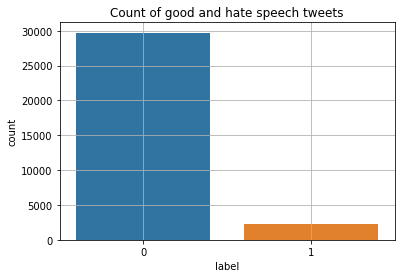

In [ ]:
# plotting  histogram to illustrate the distribution of the lables
sns.countplot(tweet_data['label'])
plt.title('Count of good and hate speech tweets')
plt.grid()
plt.show()

## **Visualizing the common phrases or words in tweets**

In [ ]:
from collections import Counter

In [ ]:
common_words = Counter()
tweet_data['tweet'].apply(common_words.update)

print(common_words.most_common(10)) #displaying the most common words in the tweets (10 of them)

[(' ', 222432), ('e', 168635), ('a', 129828), ('i', 109039), ('o', 107760), ('t', 99050), ('n', 96836), ('s', 95515), ('r', 83850), ('l', 83230)]


## **Builidng a Predictive Model**

In [ ]:
# importing the required libraries for builidng the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
# importing the train test split 
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data into training and testing set cost  into input X and output y
X = tweet_data['tweet']
y = tweet_data['label']

In [ ]:
X.shape

(31962,)

In [ ]:
y.shape

(31962,)

In [ ]:
# initializing the maximum features and maxmum length  of text
max_features = 20000 #maximum features
max_text_length = 400 #maximum text length

x_data_tokenizer = text.Tokenizer(max_features) #tokenizing the data
x_data_tokenizer.fit_on_texts(list(X)) #fitting the teokenizer te text data

In [ ]:
# applying pad sequence on the tokenized data
x_tokenized = x_data_tokenizer.texts_to_sequences(X)
x_train_val= sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [ ]:
# importing numpy to use in matrix operations
import numpy as np

In [ ]:
embedding_dim=100
embeddings_index = dict()
embedding_matrix= np.zeros((max_features,embedding_dim))
for word, index in x_data_tokenizer.word_index.items():
    if index>max_features-1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index]= embedding_vector

In [ ]:
# declaring constants in the model
filters= 270 #the number of filters to be used
kernel_size=4 #the size of the kernel
hidden_dims= 270 #the number of dimensions hidden
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                 5,
                 padding='valid',
                 activation='softmax'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 270)         108270    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 270)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 270)         364770    
                                                                 
 global_max_pooling1d (Globa  (None, 270)              0         
 lMaxPooling1D)                                         

In [ ]:
# compiling the created model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#splitiing the data 
X_trainnn,X_test,y_trainnn,y_test = train_test_split(x_train_val,y,test_size=0.3,random_state=42)
print(X_trainnn.shape,X_test.shape,y_trainnn.shape,y_test.shape)

(22373, 400) (9589, 400) (22373,) (9589,)


In [ ]:
batch_size= 32 #declairng the batch size
epochs = 3 #the number of epochs to be used
hist = model.fit(X_trainnn,y_trainnn,
                    batch_size= batch_size,
                    epochs=epochs,
                    validation_data= (X_test,y_test))

Epoch 1/3
700/700 [==============================] - 322s 458ms/step - loss: 0.2821 - accuracy: 0.9293 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 2/3
700/700 [==============================] - 327s 467ms/step - loss: 0.2538 - accuracy: 0.9304 - val_loss: 0.2573 - val_accuracy: 0.9287
Epoch 3/3
700/700 [==============================] - 320s 457ms/step - loss: 0.2537 - accuracy: 0.9304 - val_loss: 0.2584 - val_accuracy: 0.9287


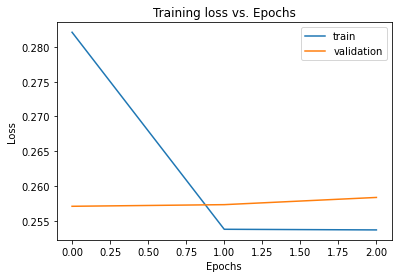

In [ ]:
# Plot loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss vs. Epochs')
plt.legend()
plt.show()

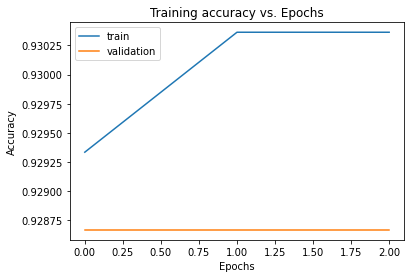

In [ ]:
# Plot accuracy
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs. Epochs')
plt.legend()
plt.show()

In [ ]:
print(len(y_test))

9589


In [ ]:
print(len(X_trainnn))

22373


In [ ]:
X_trainnn[1]


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
y_pred = model.predict(X_test,verbose=1,batch_size=32)

300/300 [==============================] - 38s 126ms/step


In [ ]:
y_pred = [0 if y[0] < 0.5 else 1 for y in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 92.87%


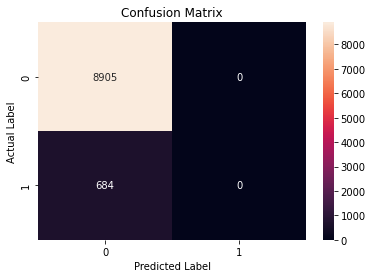

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show(fig)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      8905
           1       0.00      0.00      0.00       684

    accuracy                           0.93      9589
   macro avg       0.46      0.50      0.48      9589
weighted avg       0.86      0.93      0.89      9589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Building Tradition models** 

In [ ]:
#spliting the data 
seed = 49
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=tweet_data['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(22373,) (9589,) (22373,) (9589,)


In [ ]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)


## **Logistic Regression Model**

In [ ]:
# importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
#instantiate the model with default hyper-parameters and fitting the model into data
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)
model_pred_train = log_model.predict(X_train)
model_pred_test = log_model.predict(X_test)

## **Evaluating the developed model**

In [ ]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#accuracy on training set
print('Accuracy of Logistic Regression on training set %.2f' %accuracy_score(y_train,model_pred_train))
print('Accuracy of Logistic Regression on testing set %.2f' %accuracy_score(y_test,model_pred_test))

Accuracy of Logistic Regression on training set 0.95
Accuracy of Logistic Regression on testing set 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


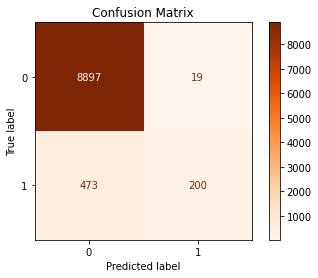

In [ ]:
plot_confusion_matrix(log_model,X_test,y_test,cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Classification Report: \n", classification_report(y_test, model_pred_test))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      8916
           1       0.91      0.30      0.45       673

    accuracy                           0.95      9589
   macro avg       0.93      0.65      0.71      9589
weighted avg       0.95      0.95      0.94      9589



## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_train_pred = random_forest.predict(X_train)
y_random_forest_predicted = random_forest.predict(X_test)

## **Evaluating Random Forest Model**

In [ ]:
#accuracy on training set
print('Accuracy of Random Forest on training set %.2f' %accuracy_score(y_train,random_forest_train_pred))
print('Accuracy of Random Forest on testing set %.2f' %accuracy_score(y_test,y_random_forest_predicted))

Accuracy of Random Forest on training set 1.00
Accuracy of Random Forest on testing set 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


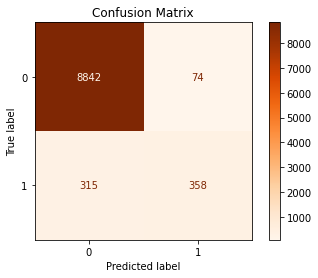

In [ ]:
plot_confusion_matrix(random_forest,X_test,y_test,cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Classification Report: \n", classification_report(y_test,y_random_forest_predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      8916
           1       0.83      0.53      0.65       673

    accuracy                           0.96      9589
   macro avg       0.90      0.76      0.81      9589
weighted avg       0.96      0.96      0.96      9589



## **BUilding Support Vector Machine**

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_classifier = SVC(kernel='rbf', random_state = 1)
svm_classifier.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
svm_train_pred = svm_classifier.predict(X_train)
svm_predicted = svm_classifier.predict(X_test)

## **Evaluating the SVM model**

In [ ]:
#accuracy on training set and testing set
print('Accuracy of SVM on training set %.2f' %accuracy_score(y_train,svm_train_pred))
print('Accuracy of SVM on testing set %.2f' %accuracy_score(y_test,svm_predicted))

Accuracy of SVM on training set 0.98
Accuracy of SVM on testing set 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


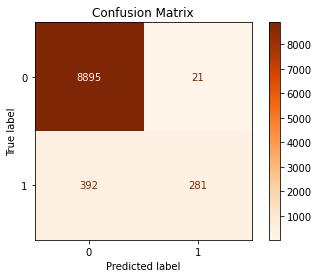

In [ ]:
plot_confusion_matrix(svm_classifier,X_test,y_test,cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(y_test,svm_predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8916
           1       0.93      0.42      0.58       673

    accuracy                           0.96      9589
   macro avg       0.94      0.71      0.78      9589
weighted avg       0.96      0.96      0.95      9589

